.import the necessary libraries

2.import the dataset

3.Handling null values

4.outlier detection---surya

5.Seperate Dependent and independent variables

6.Encoding

7.splitting into training and testing set

8.Feature scaling


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset=pd.read_csv('Churn_Modelling (1).csv')


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

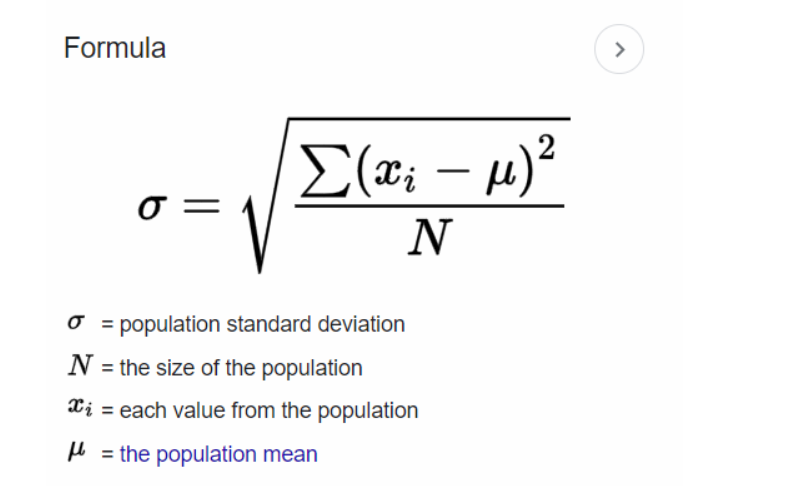

In [ ]:
df1=dataset.loc[:,["RowNumber","CustomerId","CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]]
corr=df1.corr()
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=dataset.drop('Surname',axis=1,inplace=False)
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Geography']=df['Geography'].map({'France':0,'Germany':1,'Spain':2})
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
cor=df.corr()
cor

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,-0.010358,-0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.006516,0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.007888,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,0.007888,1.000000,-0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.018196,0.002641,0.002857,-0.004719,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Age,0.000783,0.009497,-0.003965,0.022812,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,0.003739,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.069408,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,0.003972,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.008523,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


<Axes: >

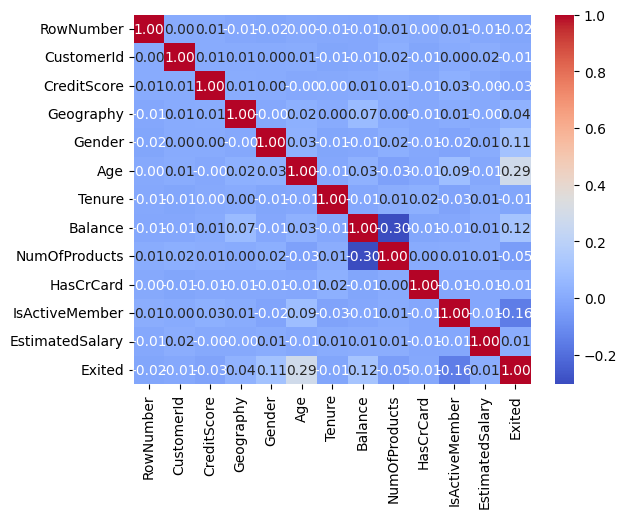

In [ ]:
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f')

In [ ]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


<Axes: ylabel='Age'>

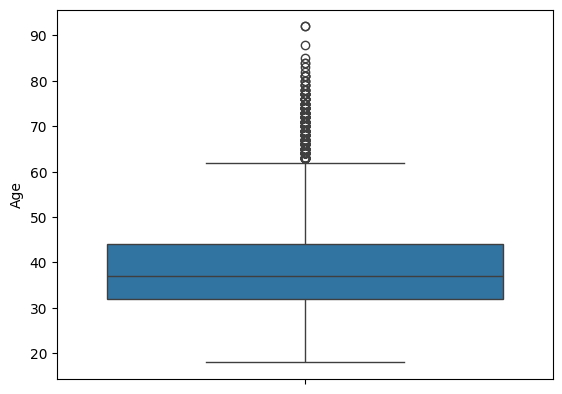

In [ ]:
sns.boxplot(df.Age)

In [ ]:
q1=df["Age"].quantile(0.25)
q2=df["Age"].quantile(0.50)
q3=df["Age"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(lower_bound)
print(upper_bound)

14.0
62.0


      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0             1    15634602          619          0       1   42       2   
1             2    15647311          608          2       1   41       1   
2             3    15619304          502          0       1   42       8   
3             4    15701354          699          0       1   39       1   
4             5    15737888          850          2       1   43       2   
...         ...         ...          ...        ...     ...  ...     ...   
9995       9996    15606229          771          0       0   39       5   
9996       9997    15569892          516          0       0   35      10   
9997       9998    15584532          709          0       1   36       7   
9998       9999    15682355          772          1       0   42       3   
9999      10000    15628319          792          0       1   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0        

<Axes: ylabel='Age'>

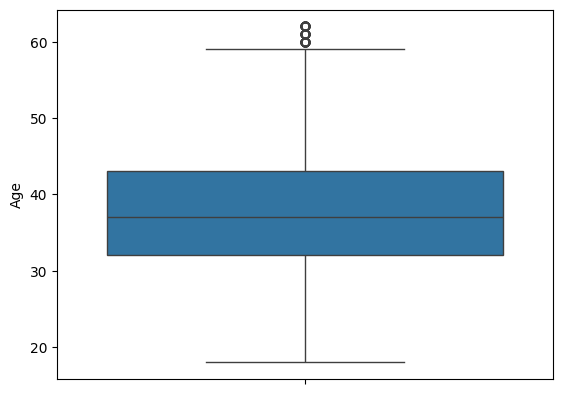

In [ ]:
df_filter=df[(df["Age"]>=lower_bound)&(df["Age"]<=upper_bound)]
print(df_filter)
sns.boxplot(df_filter.Age)

<Axes: ylabel='CreditScore'>

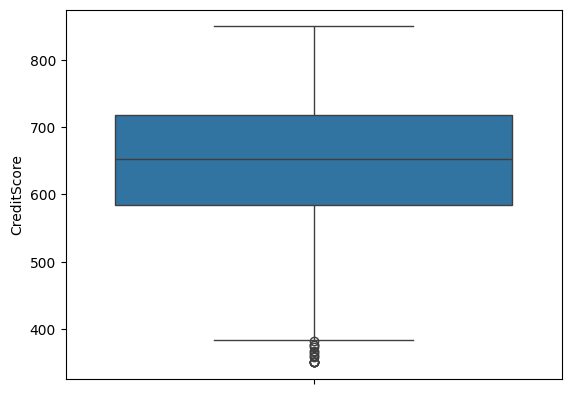

In [ ]:
sns.boxplot(df.CreditScore)

In [ ]:
q1=df["CreditScore"].quantile(0.25)
q2=df["CreditScore"].quantile(0.50)
q3=df['CreditScore'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(lower_bound)
print(upper_bound)


383.0
919.0


      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0             1    15634602          619          0       1   42       2   
1             2    15647311          608          2       1   41       1   
2             3    15619304          502          0       1   42       8   
3             4    15701354          699          0       1   39       1   
4             5    15737888          850          2       1   43       2   
...         ...         ...          ...        ...     ...  ...     ...   
9995       9996    15606229          771          0       0   39       5   
9996       9997    15569892          516          0       0   35      10   
9997       9998    15584532          709          0       1   36       7   
9998       9999    15682355          772          1       0   42       3   
9999      10000    15628319          792          0       1   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0        

<Axes: xlabel='CreditScore'>

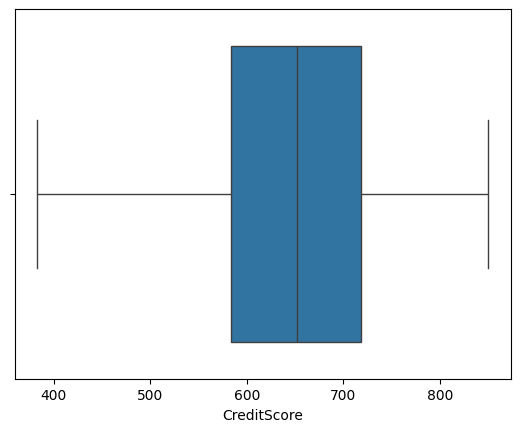

In [ ]:
df_filter=df[(df["CreditScore"]>=lower_bound)&(df["CreditScore"]<=upper_bound)]
print(df_filter)
sns.boxplot(x="CreditScore",data=df_filter)

In [ ]:
df_filter.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=df_filter.iloc[:,2:12]
y=df_filter.iloc[:,12:14]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
df_filter.shape

(9985, 13)

In [ ]:
x.shape

(9985, 10)

In [ ]:
y.shape

(9985, 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # Initialize the LabelEncoder object
df_filter['Gender'] = le.fit_transform(df_filter['Gender'])

<ipython-input-63-f79953fe7041>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Gender'] = le.fit_transform(df_filter['Gender'])


In [ ]:
geography = pd.get_dummies(x['Geography'], drop_first=True)
x=pd.concat([x,geography],axis=1)

100  rows
Training data 70-80
Test data  20-30

performance   new values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x__test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train.shape,y_train.shape,x__test.shape,y_test.shape

((6989, 10), (6989, 1), (2996, 10), (2996, 1))

In [ ]:
a=[1,2,3,4,5,6]
b=[1,0,1,5,6,3]

for i in range(5):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=100)
    print("with random state",a_train)

with random state [5, 4, 6, 1]
with random state [5, 4, 6, 1]
with random state [5, 4, 6, 1]
with random state [5, 4, 6, 1]
with random state [5, 4, 6, 1]


In [ ]:
a=[1,2,3,4,5,6]
b=[1,0,1,5,6,3]

for i in range(5):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3)
    print("with random state",a_train)

with random state [4, 2, 1, 5]
with random state [4, 2, 5, 6]
with random state [3, 6, 4, 1]
with random state [6, 2, 3, 5]
with random state [2, 4, 1, 6]


Feature Scaling
Height  180cms
Weight   45kgs


Standard scaling   mean =0 and sd =1
min max scaling    0 to 1
image.png

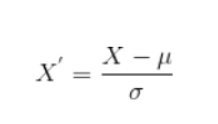

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print("Scaled X_train:\n", x_train)
print("Scaled X_test:\n", x_test)

Scaled X_train:
 [[-1.29313507  1.52223337 -0.9089745  ... -1.55809519 -1.01513818
  -0.02251701]
 [-0.7732346   1.52223337  1.10014087 ...  0.64180931  0.98508757
   0.15199109]
 [ 0.48492453  0.31189332  1.10014087 ...  0.64180931 -1.01513818
  -0.26508968]
 ...
 [-0.95000076  1.52223337  1.10014087 ...  0.64180931 -1.01513818
   0.40186516]
 [ 1.28557125 -0.89844673  1.10014087 ...  0.64180931  0.98508757
  -0.06702167]
 [-1.20995099 -0.89844673  1.10014087 ...  0.64180931 -1.01513818
   0.63515715]]
Scaled X_test:
 [[-1.72235524 -0.90908146 -0.91976316 ...  0.65736015 -1.07057546
   0.29300724]
 [-0.61606718  1.50012513 -0.91976316 ... -1.52123611 -1.07057546
  -1.00593384]
 [ 0.30236065 -0.90908146  1.08723642 ...  0.65736015 -1.07057546
   1.3493474 ]
 ...
 [ 0.38585409 -0.90908146  1.08723642 ...  0.65736015 -1.07057546
   1.72570652]
 [ 0.4797842   0.29552184  1.08723642 ...  0.65736015  0.93407708
  -1.64127664]
 [ 0.26061393 -0.90908146  1.08723642 ...  0.65736015 -1.07057546